# Парная линейная регрессия

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mvid = pd.read_csv('data_1.1/MVID_101001_171001.txt')
sber = pd.read_csv('data_1.1/SBER_101001_171001.txt')

In [4]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [5]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [6]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [7]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

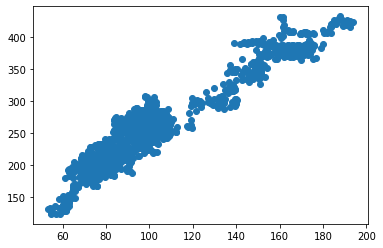

In [9]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [16]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    """Метод градиентного спуска"""
    """
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    """
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [11]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


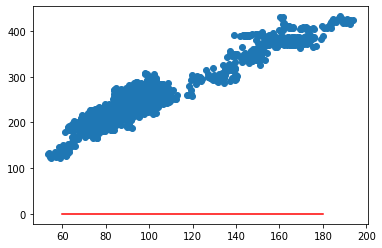

In [12]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

### Запуск градиентного спуска 

error after gradient descent: 6734.135540194945


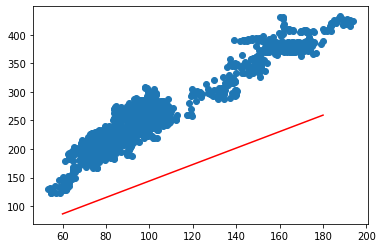

In [13]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

### Переписали функцию градиентного спуска

In [17]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


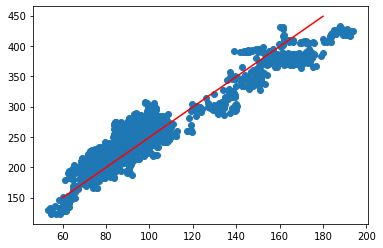

In [19]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

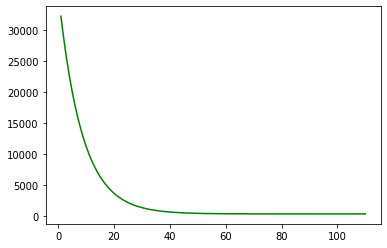

In [20]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Контрольные вопросы

1.	Сформулируйте задачу регрессии.

Задача: построение модели, способной предсказывать численную величину на основе набора признаков объекта.

2.	Что такое метод наименьших квадратов?

Это математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных.

3.	Какие функции ошибки используются в регрессионных моделях? Расскажите про три самые популярные.

Среднеквадратичная ошибка (MSE), возможно, является самой простой и наиболее распространенной функцией потерь, которую часто преподают на вводных курсах машинного обучения. Чтобы рассчитать MSE, вы берете разницу между предсказаниями вашей модели и основополагающей правдой, возводите ее в квадрат и усредняете ее по всему набору данных.

Средняя абсолютная ошибка (MAE) лишь немного отличается по определению от MSE, но, что интересно, обеспечивает почти совершенно противоположные свойства! Чтобы рассчитать MAE, вы берете разницу между предсказаниями вашей модели и основополагающей правдой, применяете абсолютное значение к этой разнице и затем усредняете его по всему набору данных.

Huber Loss предлагает лучшее из обоих миров, уравновешивая MSE и MAE. Для значений потерь меньше дельты используйте MSE; для значений потерь больше, чем дельта, используйте MAE Это эффективно объединяет лучшее из обоих миров из двух функций потерь!
Использование MAE для больших значений потерь уменьшает вес, который мы придаем выбросам, так что мы по-прежнему получаем хорошо округленную модель. В то же время мы используем MSE для меньших значений потерь, чтобы поддерживать квадратичную функцию вблизи центра.

4.	Что показывает конкретное значение ошибки регрессии?

Насколько текущая модель неточна посравнению с идеальной моделью

5.	Зачем нужно строить кривые обучения?

Кривая обучения это - математическое выражение феномена, заключающегося в том, что при повторении сложных и трудоёмких процедур время, расходуемое на единицу труда, сокращается с постоянной скоростью. Кривая обучения моделирует математически это снижение времени на производство единицы продукции.